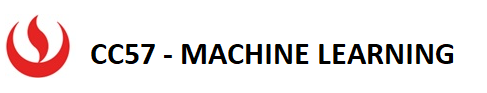

## **ACTIVIDAD #2:** E-COMMERCE AMAZON LIBROS - ANALISIS ESTADISTICO

###**1. DESCRIPCION**

**Amazon.com Inc.** es una tienda de comercio electrónico estadounidense que ofrece una amplia gama de productos, incluyendo libros, música, películas, y computadoras. También ofrece servicios basados en la web, fabrica dispositivos electrónicos tales como Kindle y tabletas, y ofrece servicios de auto-publicación. (Fuente: https://www.bnamericas.com/es/perfil-empresa/amazoncom-inc#:~:text=Amazon.com%20Inc.,ofrece%20servicios%20de%20auto%2Dpublicaci%C3%B3n)

### **2. OBJETIVO**

Realizar un análisis EDA a partir de los datos proporcionados y calcular/visualizar sus principales estadísticas.

####**3. ANALISIS EXPLORATORIO DE LOS DATOS**

El dataset a analizar contiene datos de libros vendidos en Amazon, tanto en formato digital (plaforma Kindle) y fisica.  Cuenta con 133102 observaciones en 16 variables.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####**3.1. Librerias**

In [ ]:
#Incluya las principales librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

####**3.2. Carga de datos**

In [ ]:
# Cargar datos de libros_amazon.csv
data=pd.read_csv('/content/drive/MyDrive/Septimo Ciclo/Machine Learning/Semana 2/Miercoles/Actividad #1: Preprocesamiento y Análisis Estadístico de los datos/libros_amazon.csv')

In [ ]:
data.columns


Index(['asin', 'title', 'author', 'soldBy', 'imgUrl', 'productURL', 'stars',
       'reviews', 'price', 'isKindleUnlimited', 'category_id', 'isBestSeller',
       'isEditorsPick', 'isGoodReadsChoice', 'publishedDate', 'category_name'],
      dtype='object')

####**3.3. Resumen de los datos**


In [ ]:
#Info, head y shape
##Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

In [ ]:
data.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


In [ ]:
data.shape
#(numero de filas, numeros de columnas)

(133102, 16)

In [ ]:
# Mostrar detalles estadísticos básicos (solo los calcula a las variables numericas)
## Stars
print(data["stars"].describe())
print(f"Mediana: {data['stars'].mean()}")
print(f"Mode: {data['stars'].mode()[0]}")

count    133102.000000
mean          4.404090
std           0.745646
min           0.000000
25%           4.400000
50%           4.500000
75%           4.700000
max           5.000000
Name: stars, dtype: float64
Mediana: 4.404090096317111
Mode: 4.6


In [ ]:
## reviews
print(data["reviews"].describe())
print(f"Mediana: {data['reviews'].mean()}")
print(f"Mode: {data['reviews'].mode()[0]}")

count    133102.000000
mean        887.375779
std        5104.878777
min           0.000000
25%           0.000000
50%           4.000000
75%         365.000000
max      618227.000000
Name: reviews, dtype: float64
Mediana: 887.3757794773933
Mode: 0


In [ ]:
## Price
print(data["price"].describe())
print(f"Mediana: {data['price'].mean()}")
print(f"Mode: {data['price'].mode()[0]}")

count    133102.000000
mean         15.134127
std          22.254986
min           0.000000
25%           4.990000
50%           9.990000
75%          14.990000
max         682.000000
Name: price, dtype: float64
Mediana: 15.134127285840933
Mode: 9.99


In [ ]:
# Verificar data faltante en cada columna y duplicados en las filas
# Datos faltantes:
data.isnull().sum()

,0
asin,0
title,0
author,425
soldBy,9233
imgUrl,0
productURL,0
stars,0
reviews,0
price,0
isKindleUnlimited,0


In [ ]:
# Verificar si el DataFrame tiene algún valor nulo
print("\n¿Hay valores nulos en el DataFrame?")
print(data.isnull().values.any())


¿Hay valores nulos en el DataFrame?
True


In [ ]:
# Datos duplicados en las filas
data.duplicated().sum()

np.int64(0)

In [ ]:
#Verificar proporciones de valores nulos
print("Proporciones de valores nulos por columna:")
print(((data.isnull().sum() / len(data)) * 100).round(2))


Proporciones de valores nulos por columna:
asin                  0.00
title                 0.00
author                0.32
soldBy                6.94
imgUrl                0.00
productURL            0.00
stars                 0.00
reviews               0.00
price                 0.00
isKindleUnlimited     0.00
category_id           0.00
isBestSeller          0.00
isEditorsPick         0.00
isGoodReadsChoice     0.00
publishedDate        36.83
category_name         0.00
dtype: float64


In [ ]:
#Verificar duplicación de registros u observaciones
# Verificar si hay filas duplicadas
duplicados = data.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


In [ ]:
#Observacion de filas duplicadas
print("Filas duplicadas:")
print(data[data.duplicated()])

Filas duplicadas:
Empty DataFrame
Columns: [asin, title, author, soldBy, imgUrl, productURL, stars, reviews, price, isKindleUnlimited, category_id, isBestSeller, isEditorsPick, isGoodReadsChoice, publishedDate, category_name]
Index: []


###**3.4. Preprocesamiento de los datos**

Tome la decision de reemplazar los datos faltantes del author y el soldby, por la moda, ya que son datos cualitativos nominales, ademas que la cantidad de datos nulos son menor al 8%, por lo cual no mostraria un daño muy grande reemplazar sus datos. En cambio con publisheDate tome la decision de eliminar la columna, aunque el numero no es mayor al 95% de datos faltantes para tomar una accion drastica, es un dato irrelevante ya que por el momento no me aporta nada.

In [ ]:
#Como solucionamos los datos faltantes? Eliminamos todos los datos faltantes?
#Utilice una tecnica para reemplazar los datos faltantes (una para valores numericos y otra para categoricos)

# Author
data['author'] = data['author'].fillna(data['author'].mode()[0])

#Soldby
data['soldBy'] = data['soldBy'].fillna(data['soldBy'].mode()[0])


In [ ]:
#Eliminado la columna publishedDate
datanueva = data.drop('publishedDate', axis=1, inplace=True)

In [ ]:
# Ahora me sale que elimine la columna
'publishedDate' in data.columns

False

In [ ]:
datanueva = data.copy()


In [ ]:
datanueva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             133102 non-null  object 
 3   soldBy             133102 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  category_name      133102 non-null  object 
dtypes: bool(4), float64(2), int64(2), object(7)
memory 

In [ ]:
# Paso 1: Crear un DataFrame con los datos
df_nueva = pd.DataFrame(datanueva)

# Paso 2: Guardar el DataFrame como un archivo CSV
csv_path = '/content/datanueva.csv'
df_nueva.to_csv(csv_path, index=False)

# Paso 3: Descargar el archivo CSV a tu computadora
from google.colab import files
files.download(csv_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Cargare la data limpia
data_limpia = pd.read_csv('/content/drive/MyDrive/Septimo Ciclo/Machine Learning/Semana 2/Miercoles/Actividad #1: Preprocesamiento y Análisis Estadístico de los datos/datanueva.csv')

In [ ]:
#Verificamos que no existan datos faltantes
# Datos faltantes:
data_limpia.isnull().sum()

,0
asin,0
title,0
author,0
soldBy,0
imgUrl,0
productURL,0
stars,0
reviews,0
price,0
isKindleUnlimited,0


In [ ]:
#Solucionar duplicidad en los datos (si existen)
data_limpia.duplicated().sum()

np.int64(0)

In [ ]:
#Identificar variables con valores atipicos
# Primero vamos a ver el describe
data_limpia.describe()

,stars,reviews,price,category_id
count,133102.000000,133102.000000,133102.000000,133102.000000
mean,4.404090,887.375779,15.134127,16.287111
std,0.745646,5104.878777,22.254986,8.416924
min,0.000000,0.000000,0.000000,1.000000
25%,4.400000,0.000000,4.990000,9.000000
50%,4.500000,4.000000,9.990000,16.000000
75%,4.700000,365.000000,14.990000,23.000000
max,5.000000,618227.000000,682.000000,31.000000


<Axes: xlabel='stars'>

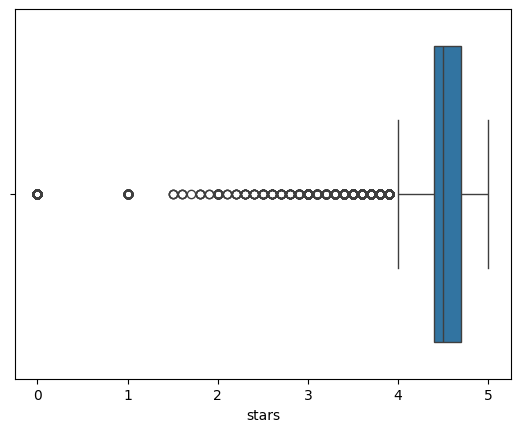

In [ ]:
sns.boxplot(x=data_limpia['stars'])

In [ ]:
# Seleccionar la columna que quieres analizar
columna = 'stars'

Q1 = data_limpia[columna].quantile(0.25)
Q3 = data_limpia[columna].quantile(0.75)
IQR = Q3 - Q1

# Limites para definir outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
outliers = data_limpia[(data_limpia[columna] < limite_inferior) | (data_limpia[columna] > limite_superior)]
print(outliers)

              asin                                              title  \
18      B07JKJCWGY  The Girls Are Gone: The True Story of Two Sist...   
59      B0BQX3JNJM  The Holiday Home: A completely unputdownable a...   
216     B0CGY411P6  Kissing Asphalt: The Courageous True Story of ...   
557     B0919CGMKD  The Mothers: Five women. Five secrets. One mis...   
588     B0CFYVMDRB  Fighting for the Soul of Your Child: A Practic...   
...            ...                                                ...   
132878  B0CJX9BLWZ            ADVENTURES OF THE SACI KIDS: A NEW HOME   
132925  B07RB3VFW7           Kingdom of War (Kingdom Journals Book 4)   
132945  B0CJ8Z8HFL  The Enchanted Forest: Magic, friendship and un...   
133018  B0CJKTR7KP                                Peepa’s Purple Soup   
133076  B007032W60                     The Hunger Games Tribute Guide   

                    author                   soldBy  \
18        Michael Brodkorb  Amazon.com Services LLC   
59           

<Axes: xlabel='reviews'>

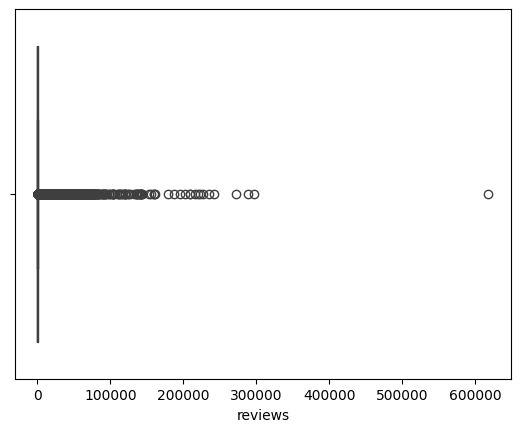

In [ ]:
sns.boxplot(x=data_limpia['reviews'])

In [ ]:
# Seleccionar la columna que quieres analizar
columna = 'reviews'

Q1 = data_limpia[columna].quantile(0.25)
Q3 = data_limpia[columna].quantile(0.75)
IQR = Q3 - Q1

# Limites para definir outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
outliers = data_limpia[(data_limpia[columna] < limite_inferior) | (data_limpia[columna] > limite_superior)]
print(outliers)

             asin                                              title  \
28600  B0BJSGV831          The Covenant of Water (Oprah's Book Club)   
28601  B0BL126WSH                 Tom Lake: A Reese's Book Club Pick   
28602  B098PW8NP8                      Lessons in Chemistry: A Novel   
28603  B09QMHZ53K          Demon Copperhead: A Pulitzer Prize Winner   
28604  B015FELXQ0  A Court of Mist and Fury (A Court of Thorns an...   
...           ...                                                ...   
98345  B07CJVDS2F  A Guide Book of United States Coins 2019: The ...   
98357  B00WGX4FSM  Amazing Origami: Traditional Japanese Folding ...   
98358  B009P3KYV8          Double Shot: A Humorous and Romantic Cozy   
98403  B07HCSPS5H  How to House-Plant: A Beginner's Guide to Maki...   
98462  B08T6J62RC  Rock Art Handbook: Techniques and Projects for...   

                   author                    soldBy  \
28600    Abraham Verghese   Amazon.com Services LLC   
28601        Ann Patchett

<Axes: xlabel='price'>

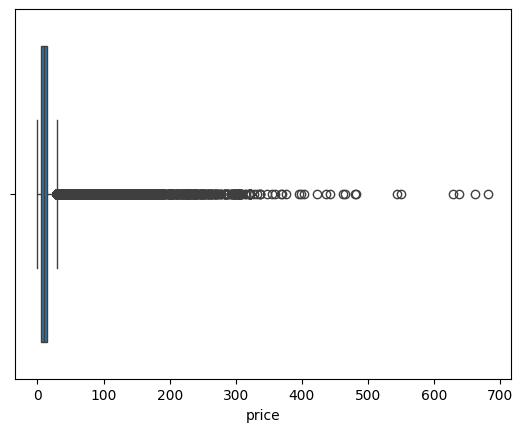

In [ ]:
sns.boxplot(x=data_limpia['price'])

In [ ]:
# Seleccionar la columna que quieres analizar
columna = 'price'

Q1 = data_limpia[columna].quantile(0.25)
Q3 = data_limpia[columna].quantile(0.75)
IQR = Q3 - Q1

# Limites para definir outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
outliers = data_limpia[(data_limpia[columna] < limite_inferior) | (data_limpia[columna] > limite_superior)]
print(outliers)

              asin                                              title  \
104     B07R7F1TQK                    Child Development and Education   
119     B09D3YTGQJ  School Social Work: Practice, Policy, and Rese...   
249     B0B1JLJM4R                   Development Through The Lifespan   
265     B0BN72SX5C  Autism Spectrum Disorders from Theory to Pract...   
275     B01BHSQ8R2  Child, Family, and Community: Family-Centered ...   
...            ...                                                ...   
132630  0007453604                                       Awful Auntie   
132711  B007QUORMY  The Dork Diaries Set: Dork Diaries Books 1, 2,...   
132825  8417821236             Estuche La Selección (Spanish Edition)   
132855  0415150302  Ukrainian: A Comprehensive Grammar (Routledge ...   
132893  1302946838  EXCALIBUR EPIC COLLECTION: THE SWORD IS DRAWN ...   

                      author                   soldBy  \
104       Teresa M. McDevitt   Pearson Education,Inc.   
119      

<Axes: xlabel='category_id'>

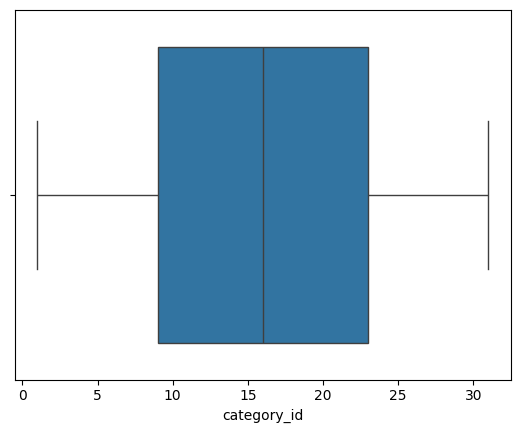

In [ ]:
sns.boxplot(x=data_limpia['category_id'])

In [ ]:
def tiene_outliers(data, columna):
    Q1 = data_limpia[columna].quantile(0.25)
    Q3 = data_limpia[columna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = data_limpia[(data_limpia[columna] < limite_inferior) | (data_limpia[columna] > limite_superior)]

    return "Sí" if not outliers.empty else "No"


In [ ]:
respuesta = tiene_outliers(data_limpia, 'category_id')
print("¿Tiene outliers en 'category_id'? ->", respuesta)


¿Tiene outliers en 'category_id'? -> No


In [ ]:
def eliminar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

# Copiar el DataFrame original
data_sin_outliers = data_limpia.copy()

# Columnas a limpiar
columnas_a_limpiar = ['price', 'reviews', 'stars']

# Aplicar el filtro de outliers a cada columna
for col in columnas_a_limpiar:
    data_sin_outliers = eliminar_outliers_iqr(data_sin_outliers, col)

# Guardar el resultado en CSV
data_sin_outliers.to_csv('libros_amazon_sin_outliers.csv', index=False)


In [ ]:
from google.colab import files
files.download('/content/libros_amazon_sin_outliers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Genere un dataset con los datos preparados
datanueva=pd.read_csv('/content/libros_amazon_sin_outliers.csv')

In [ ]:
len(data)

133102

In [ ]:
len(datanueva)

96541

\A partir de los datos preparados, trabaje las siguientes secciones.

####**4. ESTADISTICA DESCRIPTIVA**

#### Usando la nueva data

In [ ]:
# A partir del dataset preparado, mostrar detalles estadísticos básicos
## reviews
print(datanueva["reviews"].describe())
print(f"Mediana: {datanueva['reviews'].mean()}")
print(f"Mode: {datanueva['reviews'].mode()[0]}")

count    96541.000000
mean       144.672025
std        260.639880
min          0.000000
25%          0.000000
50%          0.000000
75%        170.000000
max       1152.000000
Name: reviews, dtype: float64
Mediana: 144.67202535710217
Mode: 0


In [ ]:
## Price
print(datanueva["price"].describe())
print(f"Mediana: {datanueva['price'].mean()}")
print(f"Mode: {datanueva['price'].mode()[0]}")

count    96541.000000
mean         9.888296
std          5.916337
min          0.000000
25%          4.990000
50%          9.990000
75%         12.990000
max         29.990000
Name: price, dtype: float64
Mediana: 9.888296060741032
Mode: 9.99


In [ ]:
## stars
print(datanueva["stars"].describe())
print(f"Mediana: {datanueva['stars'].mean()}")
print(f"Mode: {datanueva['stars'].mode()[0]}")

count    96541.000000
mean         4.539300
std          0.219147
min          4.000000
25%          4.400000
50%          4.600000
75%          4.700000
max          5.000000
Name: stars, dtype: float64
Mediana: 4.539300400865954
Mode: 4.6


In [ ]:
#Identificar y separar variables numéricas y categóricas
datanueva.dtypes

,0
asin,object
title,object
author,object
soldBy,object
imgUrl,object
productURL,object
stars,float64
reviews,int64
price,float64
isKindleUnlimited,bool


In [ ]:
# Variables numéricas
variables_numericas = datanueva.select_dtypes(include=['int64', 'float64','bool'])

# Variables categóricas
variables_categoricas = datanueva.select_dtypes(include=['object', 'category'])


In [ ]:
print("Variables numéricas:")
print(variables_numericas.columns.tolist())

print("\nVariables categóricas:")
print(variables_categoricas.columns.tolist())


Variables numéricas:
['stars', 'reviews', 'price', 'isKindleUnlimited', 'category_id', 'isBestSeller', 'isEditorsPick', 'isGoodReadsChoice']

Variables categóricas:
['asin', 'title', 'author', 'soldBy', 'imgUrl', 'productURL', 'category_name']


In [ ]:
# Cantidad de variables numéricas
cantidad_numericas = variables_numericas.shape[1]

# Cantidad de variables categóricas
cantidad_categoricas = variables_categoricas.shape[1]

print(f"Cantidad de variables numéricas: {cantidad_numericas}")
print(f"Cantidad de variables categóricas: {cantidad_categoricas}")


Cantidad de variables numéricas: 8
Cantidad de variables categóricas: 7


####**4.1 Análisis Univariado de los Datos**

#### **Diagramas de pares y diagramas de distribución**

In [ ]:
# Generar estadísticas descriptivas para columnas numéricas

estadisticas_numericas = variables_numericas.describe()
print("=== Estadísticas Descriptivas ===")
print(estadisticas_numericas)

# Mostrar media, mediana y moda para cada variable numérica
print("\n=== Media, Mediana y Moda ===")
for columna in variables_numericas.columns:
    media = variables_numericas[columna].mean()
    mediana = variables_numericas[columna].median()
    moda = variables_numericas[columna].mode()[0]  # Tomamos la primera moda si hay varias
    print(f"\nColumna: {columna}")
    print(f"  Media: {media}")
    print(f"  Mediana: {mediana}")
    print(f"  Moda: {moda}")


=== Estadísticas Descriptivas ===
              stars       reviews         price   category_id
count  96541.000000  96541.000000  96541.000000  96541.000000
mean       4.539300    144.672025      9.888296     16.671601
std        0.219147    260.639880      5.916337      8.492308
min        4.000000      0.000000      0.000000      1.000000
25%        4.400000      0.000000      4.990000     10.000000
50%        4.600000      0.000000      9.990000     18.000000
75%        4.700000    170.000000     12.990000     24.000000
max        5.000000   1152.000000     29.990000     31.000000

=== Media, Mediana y Moda ===

Columna: stars
  Media: 4.539300400865954
  Mediana: 4.6
  Moda: 4.6

Columna: reviews
  Media: 144.67202535710217
  Mediana: 0.0
  Moda: 0

Columna: price
  Media: 9.888296060741032
  Mediana: 9.99
  Moda: 9.99

Columna: isKindleUnlimited
  Media: 0.28327860701670793
  Mediana: 0.0
  Moda: False

Columna: category_id
  Media: 16.67160066707409
  Mediana: 18.0
  Moda: 21

C

In [ ]:
# Generar estadísticas descriptivas para columnas categóricas
# Si No hay variables categoricas, considere crear algunas

variables_categoricas = datanueva.select_dtypes(include=['category'])

# Mostrar columnas categóricas encontradas
print("Columnas categóricas:")
print(variables_categoricas.columns)

Columnas categóricas:
Index([], dtype='object')


In [ ]:
# Creare una columna categorica
# Crear una columna categórica artificial si no hay
datanueva['Calidad_Producto'] = ['A', 'B', 'A', 'C', 'B'] * (len(datanueva) // 5) + ['A'] * (len(datanueva) % 5)

# Asegúrate de convertirla al tipo category
datanueva['Calidad_Producto'] = datanueva['Calidad_Producto'].astype('category')


In [ ]:
print(datanueva['Calidad_Producto'].describe())


count     96541
unique        3
top           A
freq      38617
Name: Calidad_Producto, dtype: object


In [ ]:
# Ver describe solo para categorías
datanueva.select_dtypes(include='category').describe()

,Calidad_Producto
count,96541
unique,3
top,A
freq,38617


- count     96541      # Hay 96,541 registros no nulos en la columna
- unique        3      # Hay 3 categorías distintas (A, B y C, por ejemplo)
- top           A      # La categoría más frecuente es A
- freq      38617      # A aparece 38,617 veces


In [ ]:
print(datanueva['Calidad_Producto'].dtype)

category


In [ ]:
# Mostrar solo columnas categóricas
datanueva.select_dtypes(include='category').columns


Index(['Calidad_Producto'], dtype='object')

In [ ]:
# Utilice algunas de las medidas de dispersion y representelas a traves de diagramas
# Creando un diagrama de pares y de distribucion para variables numéricas

#Empezaremos con Algunas medidas de dispersion
# Seleccionamos solo columnas numéricas que NO sean booleanas
variables_numericas = datanueva.select_dtypes(include=['number'])
variables_numericas = variables_numericas.loc[:, variables_numericas.dtypes != 'bool']

# Desviación estándar
print("📏 Desviación estándar:")
print(variables_numericas.std())

# Varianza
print("\n📐 Varianza:")
print(variables_numericas.var())

# Rango (máx - mín)
print("\n📊 Rango (máx - mín):")
print(variables_numericas.max() - variables_numericas.min())

# IQR (Q3 - Q1)
Q1 = variables_numericas.quantile(0.25)
Q3 = variables_numericas.quantile(0.75)
IQR = Q3 - Q1
print("\n📉 Rango Intercuartílico (IQR):")
print(IQR)




📏 Desviación estándar:
stars            0.219147
reviews        260.639880
price            5.916337
category_id      8.492308
dtype: float64

📐 Varianza:
stars              0.048025
reviews        67933.146865
price             35.003038
category_id       72.119292
dtype: float64

📊 Rango (máx - mín):
stars             1.00
reviews        1152.00
price            29.99
category_id      30.00
dtype: float64

📉 Rango Intercuartílico (IQR):
stars            0.3
reviews        170.0
price            8.0
category_id     14.0
dtype: float64


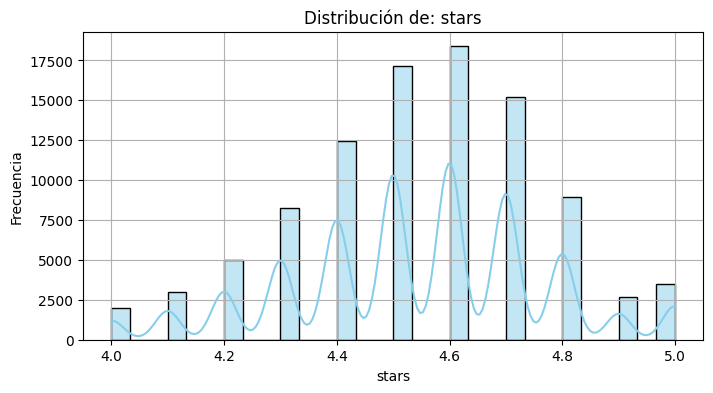

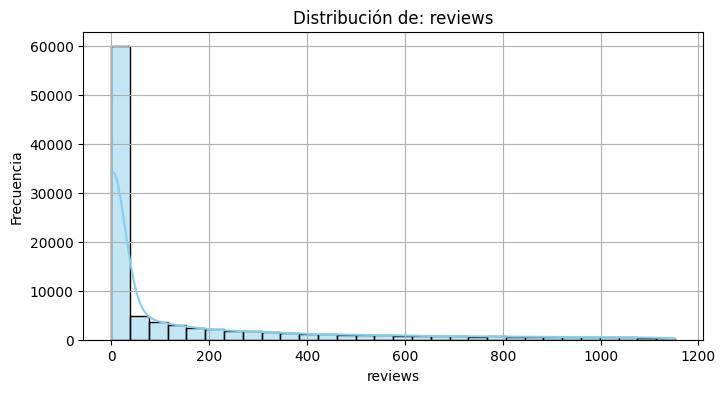

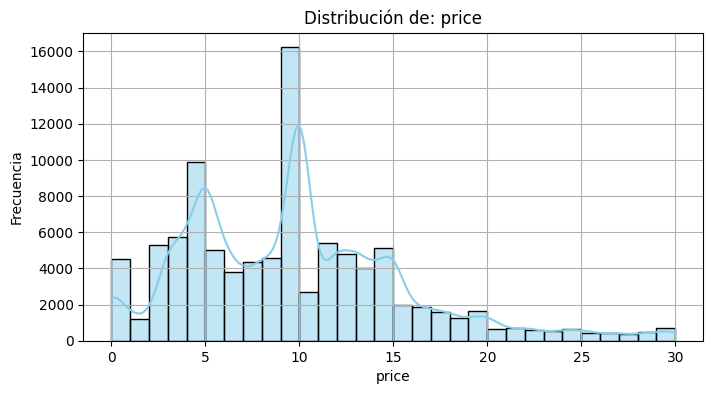

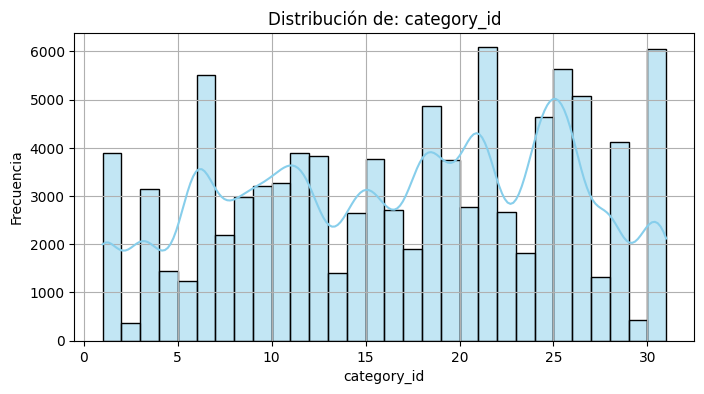

In [ ]:
# 🔷 Diagramas de Distribución (Histogramas + KDE)
for col in variables_numericas.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(datanueva[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


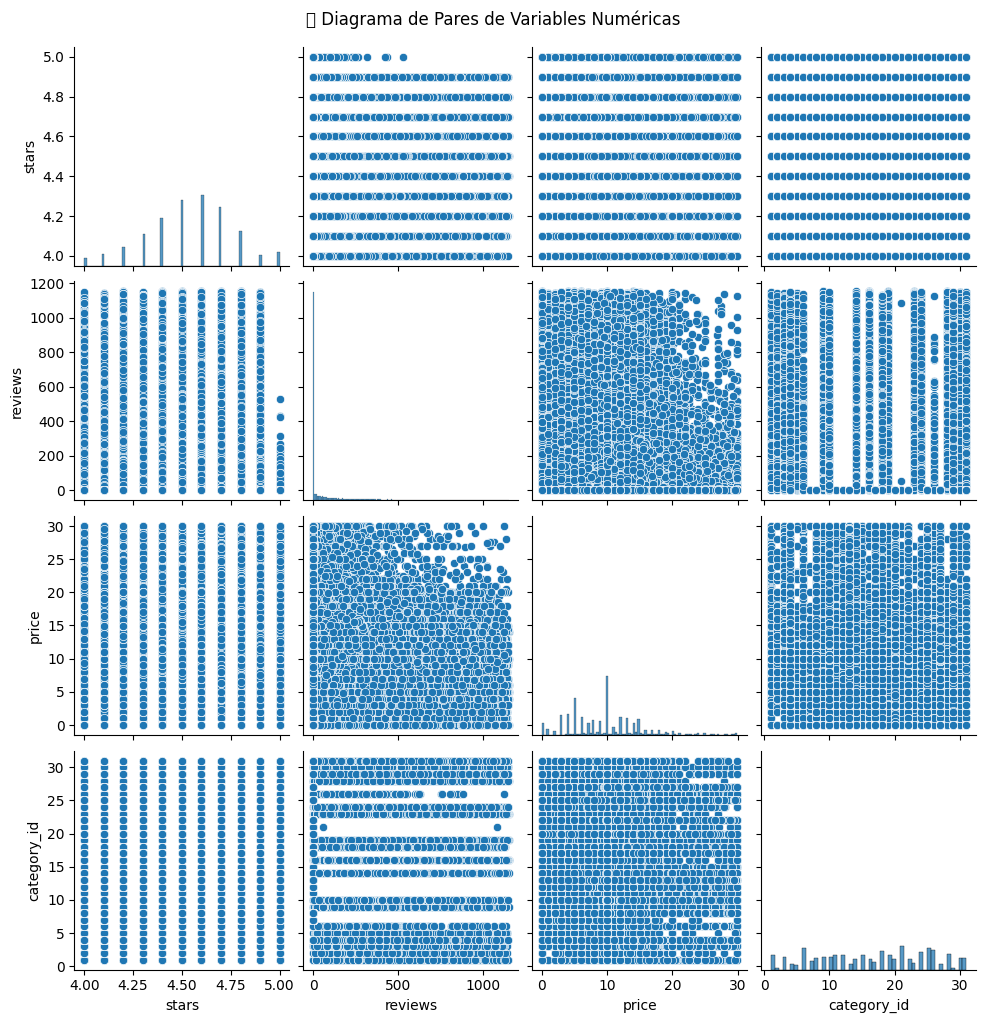

In [ ]:
# 🔷 Diagrama de Pares (Pairplot)
sns.pairplot(variables_numericas)
plt.suptitle('🔗 Diagrama de Pares de Variables Numéricas', y=1.02)
plt.show()


####**4.2 Análisis Bivariado de los Datos**

#### **- Correlacion de variables**

¿Qué es una matriz de correlación?
Cada número indica qué tan fuerte y en qué dirección se relacionan dos variables:

Valores cercanos a 1 → correlación positiva fuerte (cuando una sube, la otra también).

Valores cercanos a -1 → correlación negativa fuerte (cuando una sube, la otra baja).

Valores cercanos a 0 → poca o ninguna relación.

Spearman, además, evalúa correlaciones por orden, así que no depende de distribuciones normales.

In [ ]:
# Calcular e imprimir la matriz de correlación para variables numéricas.

# Matriz de correlación de Spearman
corr_spearman = variables_numericas.corr(method='spearman')

print("Matriz de correlación (Spearman):")
print(corr_spearman)

# Como sospechábamos, las correlaciones con category_id son bajas (< ±0.13), lo que confirma que:

# - No tiene una relación fuerte con ninguna de las otras variables numéricas.

# - Es muy probable que sea simplemente una etiqueta categórica sin orden real.

# - Puedes excluirla de la matriz de correlación en futuras visualizaciones, o bien analizarla por separado agrupando datos por categoría.

Matriz de correlación (Spearman):
                stars   reviews     price  category_id
stars        1.000000 -0.031350  0.140726     0.077891
reviews     -0.031350  1.000000 -0.033861     0.014797
price        0.140726 -0.033861  1.000000    -0.126510
category_id  0.077891  0.014797 -0.126510     1.000000


In [ ]:
# Seleccionar solo las columnas numéricas sin 'category_id' para la correlación
variables_numericas_sin_category = variables_numericas.loc[:, variables_numericas.columns != 'category_id']


In [ ]:
# Matriz de correlación de Spearman
corr_spearman_limpia = variables_numericas_sin_category.corr(method='spearman')

print("Matriz de correlación (Spearman):")
print(corr_spearman_limpia)


Matriz de correlación (Spearman):
            stars   reviews     price
stars    1.000000 -0.031350  0.140726
reviews -0.031350  1.000000 -0.033861
price    0.140726 -0.033861  1.000000



### 📊 Interpretación variable por variable:

#### ⭐ `stars` (calificación):
- Con `reviews`: **-0.031** → Muy poca correlación negativa (casi nula). Más reseñas no implican mejor o peor calificación.
- Con `price`: **+0.14** → Pequeña correlación positiva. Precios un poco más altos tienden a tener mejores estrellas, pero es débil.
- Con `category_id`: **+0.077** → Prácticamente nula. Las categorías no afectan significativamente la calificación promedio.

#### 📝 `reviews` (número de reseñas):
- Con `price`: **-0.03** → Muy débil relación negativa. Más reseñas no necesariamente indican un precio más alto o más bajo.
- Con `category_id`: **+0.014** → Nula. La categoría no afecta la cantidad de reseñas.

#### 💰 `price`:
- Con `category_id`: **-0.126** → **Relación débil negativa**. Algunas categorías tienden a tener precios más bajos que otras, pero no es muy fuerte.


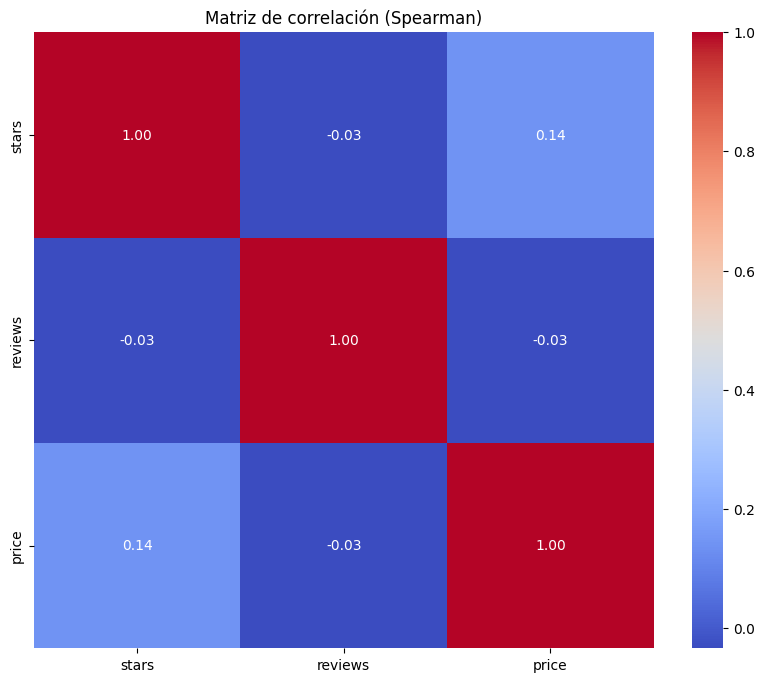

In [ ]:
# Visualizar la matriz de correlacion en un mapa de calor

# Mapa de calor para visualizar la matriz
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman_limpia, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación (Spearman)')
plt.show()

¡Perfecto! Vamos a interpretar **esos tres valores** de **asimetría (skewness)** y **curtosis** para que entiendas la **forma de la distribución** de tus variables:

---

### 📘 ¿Qué es asimetría?
Mide qué tan **desbalanceada** está la distribución:

- **0**: simétrica
- **>0**: sesgo a la derecha (cola hacia la derecha)
- **<0**: sesgo a la izquierda (cola hacia la izquierda)

### 📘 ¿Qué es curtosis?
Mide cuán **picuda o plana** es una distribución:

- **0 (Fisher)**: como una distribución normal
- **>0**: más picuda (leptocúrtica), colas pesadas
- **<0**: más plana (platicúrtica), colas ligeras

In [ ]:
# Calculo del coeficiente de asimetria y de curtosis. Como los interpreta?

# Coeficiente de asimetría (skewness)
asimetria = variables_numericas_sin_category.skew()

# Curtosis
curtosis = variables_numericas_sin_category.kurtosis()

# Mostrar resultados
print("Coeficiente de asimetría (Skewness):")
print(asimetria)

print("\nCurtosis:")
print(curtosis)


Coeficiente de asimetría (Skewness):
stars     -0.212197
reviews    2.050884
price      0.850866
dtype: float64

Curtosis:
stars     -0.153765
reviews    3.391177
price      0.907614
dtype: float64


In [ ]:
from scipy.stats import skew, kurtosis

# Calcular para cada columna numérica
for columna in variables_numericas_sin_category.columns:
    datos = variables_numericas_sin_category[columna].dropna()
    asimetria = skew(datos)
    curt = kurtosis(datos)  # Aqui colacando fisher=true me sale con fisher
    print(f"\nColumna: {columna}")
    print(f"  Asimetría: {asimetria:.4f}")
    print(f"  Curtosis: {curt:.4f}")



Columna: stars
  Asimetría: -0.2122
  Curtosis: -0.1538

Columna: reviews
  Asimetría: 2.0509
  Curtosis: 3.3909

Columna: price
  Asimetría: 0.8509
  Curtosis: 0.9075



### 🔍 Interpretación variable por variable

#### ⭐ `stars`
- **Asimetría**: `-0.21` → Ligeramente **sesgada a la izquierda**, lo que indica que hay más valores altos de estrellas que bajos (distribución un poco inclinada hacia la izquierda).
- **Curtosis**: `-0.15` → Casi normal, ligeramente **plana**, lo que significa que los valores están **más distribuidos alrededor del promedio**, sin colas muy largas.

🟢 **Interpretación general**: distribución **bastante normal**, sin problemas graves.

---

#### 🗣️ `reviews`
- **Asimetría**: `2.05` → **Fuertemente sesgada a la derecha**, lo que sugiere que la mayoría de los libros tiene pocas reseñas, pero **algunos tienen muchas**, lo cual estira la distribución.
- **Curtosis**: `3.39` → **Muy picuda** (leptocúrtica), lo que indica **valores extremos** (outliers). Muchos libros con pocas reviews y pocos con miles.

🔴 **Interpretación general**: hay **outliers importantes** en esta variable. Vale la pena visualizarla o incluso normalizarla.

---

#### 💵 `price`
- **Asimetría**: `0.85` → **Moderadamente sesgada a la derecha**. La mayoría de libros tienen precios bajos, pero hay algunos caros que estiran la distribución.
- **Curtosis**: `0.91` → Levemente más picuda que una normal. Hay **algunos precios extremos**, pero no tan fuerte como en reviews.

🟡 **Interpretación general**: distribución algo desequilibrada por libros caros, pero manejable.

---


¿Qué variables son las tienen mayor correlación?

**Respuesta:**


### 🔍 Análisis:

Ordenando los valores absolutos **más altos (sin contar 1.0):**

| Variables       | Correlación |
|----------------|-------------|
| `stars` - `price`   | **0.1407** |
| `price` - `reviews` | **0.0338** |
| `stars` - `reviews` | **0.0313** |

---

### ✅ Resultado:

La **mayor correlación** (aunque aún **débil**) es entre:

📌 **`stars` y `price` → ρ ≈ 0.14**  
Esto indica una **ligera correlación positiva**: a mayor número de estrellas, **ligeramente** tiende a haber mayor precio.



In [ ]:
# Matriz sin los 1.0 de la diagonal
mask = np.triu(np.ones(corr_spearman_limpia.shape), k=1).astype(bool)
top_corr = corr_spearman_limpia.where(mask).stack().sort_values(ascending=False)

# Mostrar top 3
print("Top 3 correlaciones más altas (Spearman):")
print(top_corr.head(3))


Top 3 correlaciones más altas (Spearman):
stars    price      0.140726
         reviews   -0.031350
reviews  price     -0.033861
dtype: float64


### **4. Visualización de los datos**

In [ ]:
datanueva.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,category_name,Calidad_Producto
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,Parenting & Relationships,A
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,Parenting & Relationships,B
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,Parenting & Relationships,A
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,Parenting & Relationships,C
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,Parenting & Relationships,B


In [ ]:
datanueva.dtypes

# Pasar a variables_categoricas -> category_name


,0
asin,object
title,object
author,object
soldBy,object
imgUrl,object
productURL,object
stars,float64
reviews,int64
price,float64
isKindleUnlimited,bool


In [ ]:
# Grafica de barras de la distribucion de los libros por categoria en orden descendente, distinga los que son betsellers de los que nolo son
datanueva['category_name'] = datanueva['category_name'].astype('category')



In [ ]:
conteo_categorias = datanueva['category_name'].value_counts()
print(conteo_categorias)

# conteo_ascendente = datanueva['category_name'].value_counts().sort_values(ascending=True)             -> por si quieres ascendente

category_name
Mystery, Thriller & Suspense    6086
Children's eBooks               5631
Parenting & Relationships       5517
Crafts, Hobbies & Home          5071
Cookbooks, Food & Wine          4870
Travel                          4635
LGBTQ+ eBooks                   4130
Engineering & Transportation    3901
Arts & Photo graphy             3883
Humor & Entertainment           3820
Science & Math                  3772
Foreign Language                3737
Computers & Technology          3267
Biographies & Memoirs           3202
Education & Teaching            3136
Religion & Spirituality         3128
Sports & Outdoors               2974
Self-Help                       2923
Law                             2766
Teen & Young Adult              2700
Reference                       2661
Politics & Social Sciences      2642
Romance                         2186
Business & Money                1895
Science Fiction & Fantasy       1807
History                         1445
Medical                 

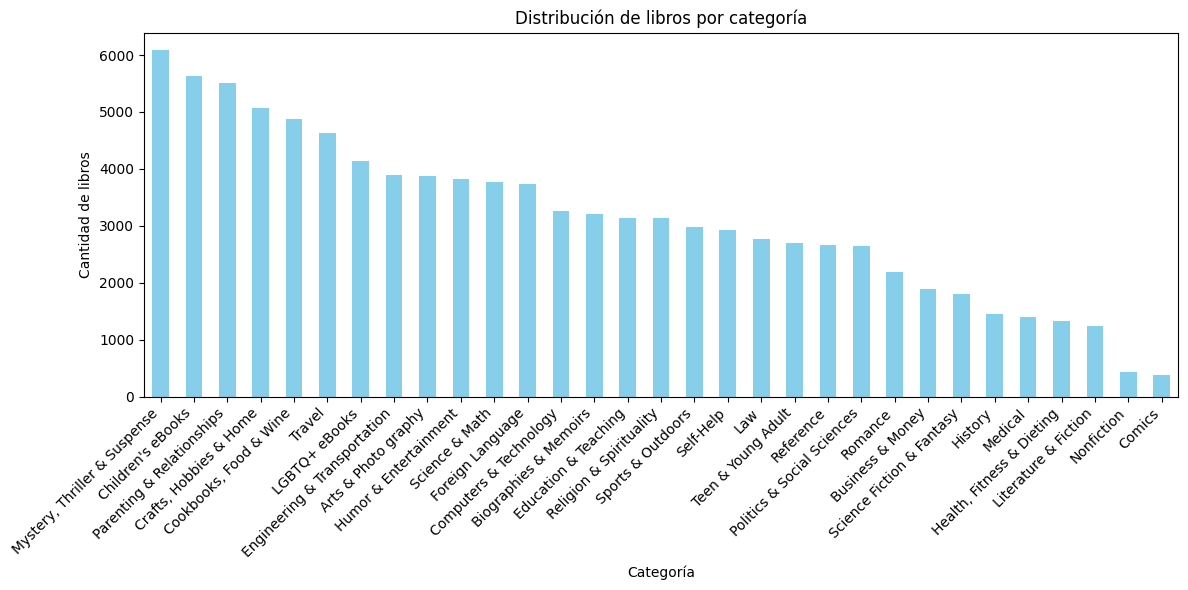

In [ ]:
# Gráfico de barras
plt.figure(figsize=(12, 6))
conteo_categorias.plot(kind='bar', color='skyblue')
plt.title('Distribución de libros por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de libros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-69-366fe65e4408>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_bestsellers = datanueva.groupby(['category_name', 'isBestSeller']).size().unstack(fill_value=0)


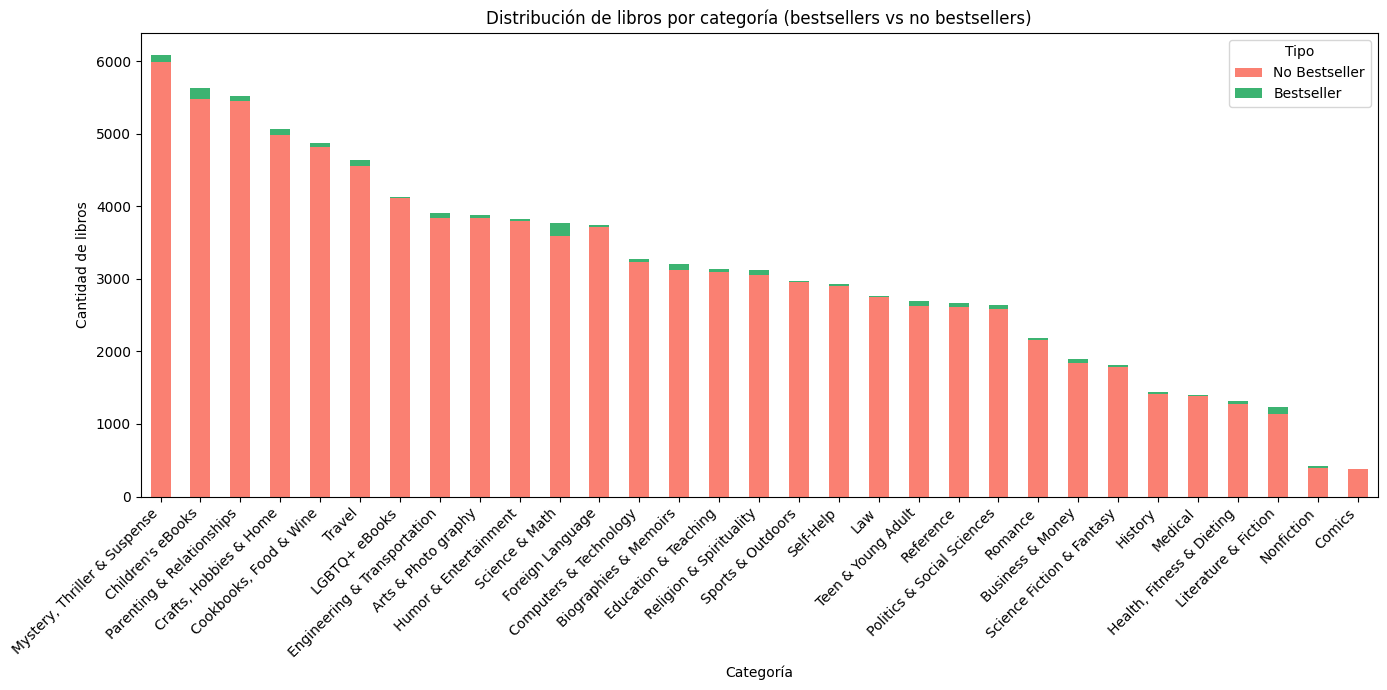

In [ ]:
datanueva['isBestSeller'] = datanueva['isBestSeller'].astype(bool)

# Agrupamos por categoría y si es bestseller
conteo_bestsellers = datanueva.groupby(['category_name', 'isBestSeller']).size().unstack(fill_value=0)

# Ordenamos por total (bestsellers + no bestsellers)
conteo_bestsellers = conteo_bestsellers.loc[conteo_bestsellers.sum(axis=1).sort_values(ascending=False).index]

# Graficamos
conteo_bestsellers.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    color=['salmon', 'mediumseagreen'],  # no bestseller = rojo claro, bestseller = verde
)

plt.title('Distribución de libros por categoría (bestsellers vs no bestsellers)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de libros')
plt.xticks(rotation=45, ha='right')
plt.legend(['No Bestseller', 'Bestseller'], title='Tipo')
plt.tight_layout()
plt.show()

In [ ]:
# 🔹 Imprimir valores exactos por categoría
print("Cantidad de libros por categoría (No Bestseller y Bestseller):\n")
print(conteo_bestsellers)

Cantidad de libros por categoría (No Bestseller y Bestseller):

isBestSeller                  False  True 
category_name                             
Mystery, Thriller & Suspense   5982    104
Children's eBooks              5481    150
Parenting & Relationships      5451     66
Crafts, Hobbies & Home         4979     92
Cookbooks, Food & Wine         4815     55
Travel                         4552     83
LGBTQ+ eBooks                  4118     12
Engineering & Transportation   3841     60
Arts & Photo graphy            3835     48
Humor & Entertainment          3796     24
Science & Math                 3597    175
Foreign Language               3711     26
Computers & Technology         3226     41
Biographies & Memoirs          3127     75
Education & Teaching           3095     41
Religion & Spirituality        3055     73
Sports & Outdoors              2961     13
Self-Help                      2900     23
Law                            2743     23
Teen & Young Adult             26

In [ ]:
# Cantidad de libros por cada categoria
conteo_categorias = datanueva['category_name'].value_counts()
print(conteo_categorias)

category_name
Mystery, Thriller & Suspense    6086
Children's eBooks               5631
Parenting & Relationships       5517
Crafts, Hobbies & Home          5071
Cookbooks, Food & Wine          4870
Travel                          4635
LGBTQ+ eBooks                   4130
Engineering & Transportation    3901
Arts & Photo graphy             3883
Humor & Entertainment           3820
Science & Math                  3772
Foreign Language                3737
Computers & Technology          3267
Biographies & Memoirs           3202
Education & Teaching            3136
Religion & Spirituality         3128
Sports & Outdoors               2974
Self-Help                       2923
Law                             2766
Teen & Young Adult              2700
Reference                       2661
Politics & Social Sciences      2642
Romance                         2186
Business & Money                1895
Science Fiction & Fantasy       1807
History                         1445
Medical                 

Top 10 Autores con más Best Sellers:
author
J.K. Rowling           8
James Patterson        8
DK                     8
Paul Levine            6
Explore ToWin          6
Captivating History    6
Paige Dearth           6
Freida McFadden        6
William Bernhardt      5
Disney Book Group      4
Name: count, dtype: int64


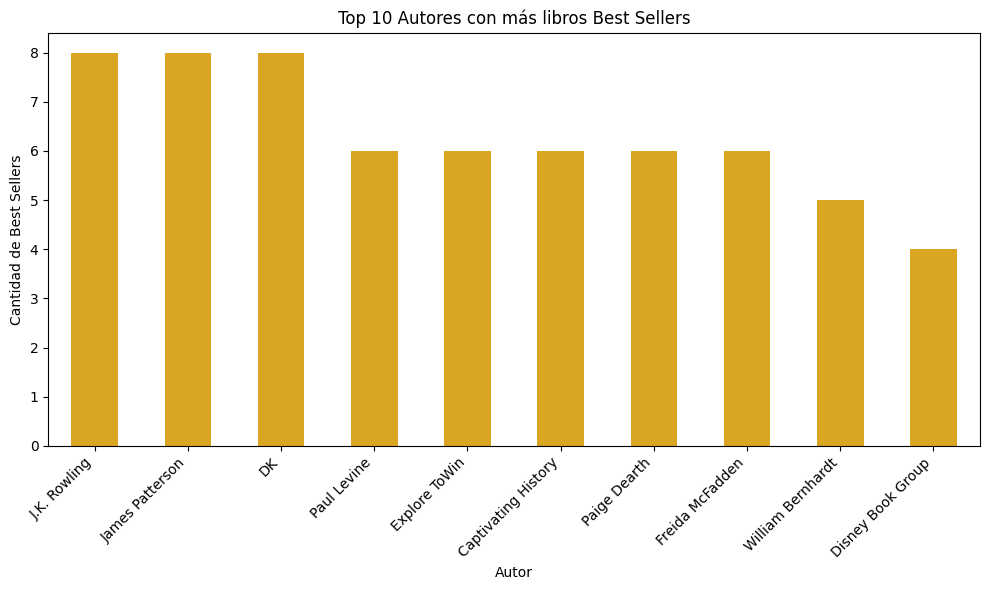

In [ ]:
#Top Autores de Best Sellers

# Filtrar solo los libros que son bestsellers
bestsellers = datanueva[datanueva['isBestSeller'] == True]

# Contar la cantidad de veces que aparece cada autor
top_autores = bestsellers['author'].value_counts().head(10)

# Imprimir los resultados
print("Top 10 Autores con más Best Sellers:")
print(top_autores)

# Gráfico de barras
plt.figure(figsize=(10, 6))
top_autores.plot(kind='bar', color='goldenrod')
plt.title('Top 10 Autores con más libros Best Sellers')
plt.xlabel('Autor')
plt.ylabel('Cantidad de Best Sellers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
#Ratings for Best Sellers

# Filtrar libros que son Best Sellers
bestsellers = datanueva[datanueva['isBestSeller'] == True]

# Ordenar por la columna 'stars' en orden descendente
top_rated_bestsellers = bestsellers.sort_values(by='stars', ascending=False)

# Seleccionar las columnas relevantes y mostrar los 10 primeros
top_10_rated = top_rated_bestsellers[['title', 'stars']].head(10)

# Mostrar los resultados
print("Top 10 libros Best Sellers con mejor rating:")
print(top_10_rated.to_string(index=False))


Top 10 libros Best Sellers con mejor rating:
                                                                                                                                                                                               title  stars
                                                                                           The Wrestling Observer Complete Collection: 1989 January-December (Wrestling Observer Newsletter Book 12)    5.0
                                                                                Courageous Cats: Based on the Incredibly True Stories of Hero Cats Who Saved Lives as Told from Their Purr-spectives    5.0
                                                                                                                   Think Faster, Talk Smarter: How to Speak Successfully When You're Put on the Spot    5.0
                                                                                                              Hormone Havoc: Dispelling the

<ipython-input-74-d3c903ac5200>:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


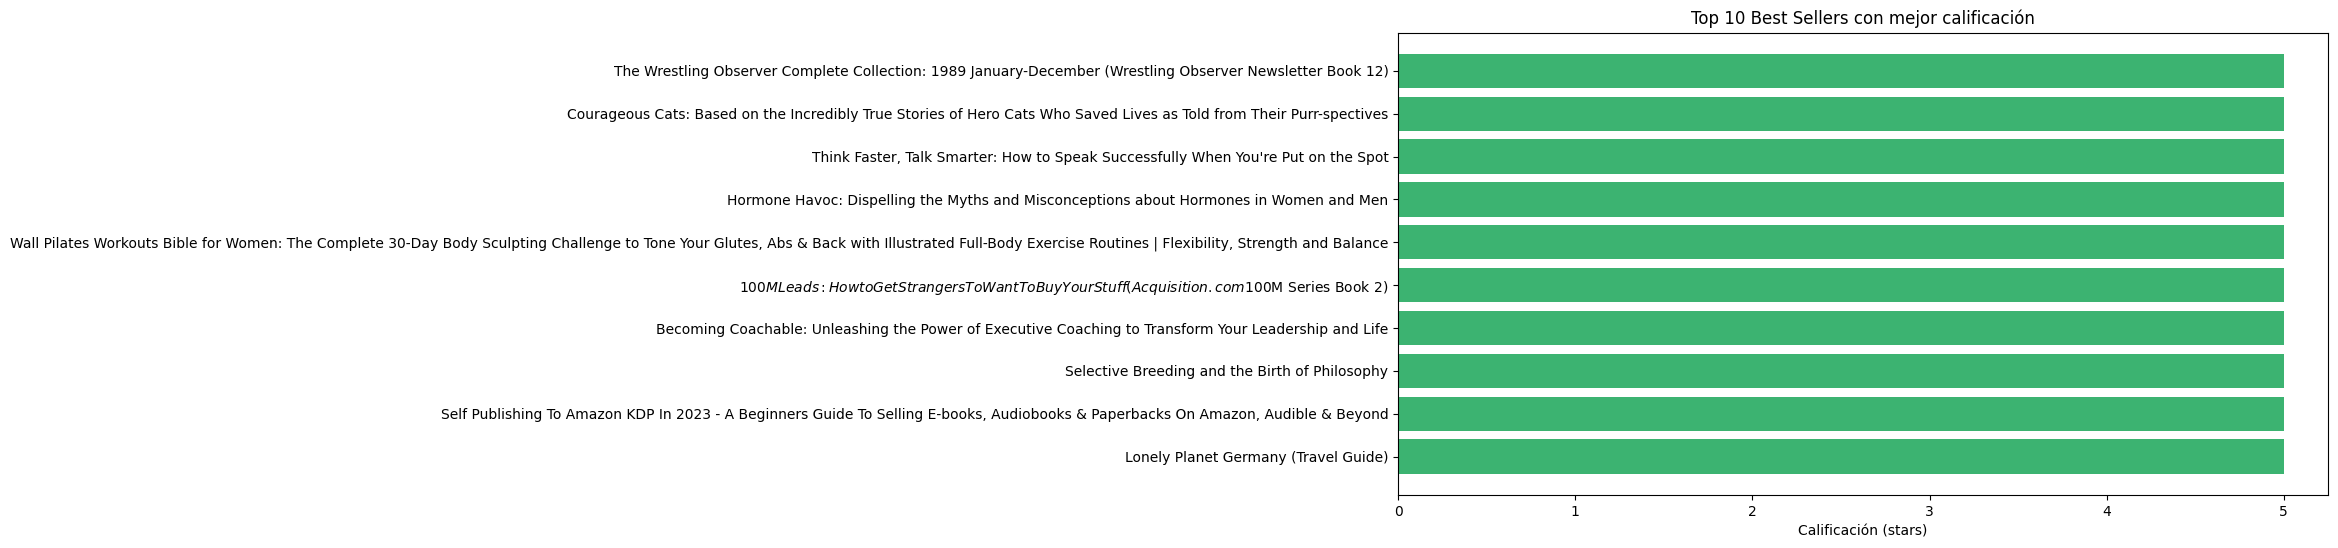

In [ ]:

plt.figure(figsize=(12, 6))
plt.barh(top_10_rated['title'], top_10_rated['stars'], color='mediumseagreen')
plt.xlabel('Calificación (stars)')
plt.title('Top 10 Best Sellers con mejor calificación')
plt.gca().invert_yaxis()  # Para que el mejor calificado esté arriba
plt.tight_layout()
plt.show()

### **5. Observaciones**

**Respuesta:** (liste las principales observaciones o conclusiones observadas luego del análisis)



1. **Distribución de categorías:**  
   Las categorías con más libros en la plataforma son *Mystery, Thriller & Suspense*, *Children's eBooks* y *Parenting & Relationships*. Esto sugiere que los usuarios tienen una fuerte preferencia por géneros de suspenso, literatura infantil y temas familiares.

2. **Best Sellers por categoría:**  
   Se observa que algunas categorías tienen una proporción mayor de libros que son Best Sellers. Por ejemplo, en *Parenting & Relationships* y *Cookbooks, Food & Wine* hay una presencia notable de libros populares, lo que podría estar relacionado con necesidades prácticas o temas de alto interés.

3. **Autores más exitosos:**  
   El análisis del Top 10 de autores con más Best Sellers revela que algunos autores tienen una presencia constante en el ranking, indicando una fuerte fidelidad del público o una estrategia de publicación efectiva.

4. **Calificaciones (Stars):**  
   Los libros Best Sellers con mejor calificación (`stars`) suelen tener entre 4.7 y 5 estrellas, lo que sugiere una alta satisfacción de los lectores. Esto confirma que la popularidad y la calidad percibida están relacionadas.

5. **Asimetría y curtosis:**  
   Variables como `reviews` muestran una asimetría positiva pronunciada, indicando que la mayoría de libros tiene pocas reseñas, mientras unos pocos tienen muchas. Asimismo, la curtosis también es alta, mostrando presencia de valores extremos (outliers).

6. **Correlación entre variables:**  
   Se encontró una leve correlación positiva entre el precio y las estrellas, lo que sugiere que los libros más caros pueden estar mejor valorados, aunque esta relación no es fuerte. `category_id` no mostró relaciones significativas, por lo que se excluyó de algunos análisis.
